## **HOMEWORK 4.1: Factory Production Scheduling**

4 machines need to process 12 jobs: find the optimal assignment of jobs to machines that minimizes the total time

In [29]:

# Required imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from typing import List, Tuple, Dict
import random
from copy import deepcopy

np.random.seed(42)
random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [30]:
#Processing times: processing_times[job_id][machine_id]

processing_times = np.array([
    [3, 5, 4, 6],  # J1
    [2, 4, 3, 5],  # J2
    [4, 6, 5, 7],  # J3
    [5, 3, 6, 4],  # J4
    [3, 7, 4, 5],  # J5
    [6, 4, 5, 3],  # J6
    [2, 5, 3, 6],  # J7
    [4, 3, 7, 5],  # J8
    [5, 6, 4, 3],  # J9
    [3, 4, 5, 6],  # J10
    [6, 5, 3, 4],  # J11
    [4, 6, 5, 7],  # J12
])

NUM_JOBS = len(processing_times)
NUM_MACHINES = len(processing_times[0])

job_names = [f'J{i + 1}' for i in range (NUM_JOBS)]
machine_names = [f'M{i + 1}' for i in range(NUM_MACHINES)]

print(f"Factory Configuration:")
print(f"  Machines: {NUM_MACHINES}")
print(f"  Jobs to schedule: {NUM_JOBS}")
print(f"  Total work hours: {processing_times.sum()}")
print(f"  Average per machine (if balanced): {processing_times.sum() / NUM_MACHINES:.1f} hours")

Factory Configuration:
  Machines: 4
  Jobs to schedule: 12
  Total work hours: 220
  Average per machine (if balanced): 55.0 hours


In [31]:
#Implement the fitness function

def calculate_makespan(schedule: np.ndarray, processing_times: np.ndarray) -> float:
    machine_times = np.zeros(NUM_MACHINES)
    
    for job_id in range(NUM_JOBS):
        machine_id = schedule[job_id]
        time =  processing_times[job_id][machine_id]
        machine_times[machine_id] += time

    return np.max(machine_times)

In [32]:
#Test with a simple schedule
test_schedule = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]) #Assing 3 jobs to each machine
test_makespan = calculate_makespan(test_schedule, processing_times)
print(f"Test schedule makespan: {test_makespan if test_makespan else 'Not implemented yet'}")

Test schedule makespan: 17.0


In [39]:
#Implement Genetic Algorithm

def create_individual() -> np.ndarray:
    return np.random.randint(0, NUM_MACHINES, size = NUM_JOBS)

def create_population(size: int) -> List[np.ndarray]:
    return [create_individual() for _ in range(size)]

def selection(population: List[np.ndarray], fitness_scores: List[float], k: int = 3) -> np.ndarray:
    #Implement a tournament selection of k random individuals
    tournament = random.sample(list(zip(population, fitness_scores)), k)

    return min(tournament, key=lambda x: x[1])[0].copy()

def crossover(parent1: np.ndarray, parent2: np.ndarray) ->Tuple[np.ndarray, np.ndarray]:
    #Implement single-point crossover

    #Choose a random crossover point
    point = random.randint(1, NUM_JOBS - 1)

    child1 = np.concatenate([parent1[: point], parent2[point :]])
    child2 = np.concatenate([parent2[: point], parent1[point :]])

    return child1, child2

def mutate(individual: np.ndarray, mutation_rate: float = 0.1) -> np.ndarray:
    mutated = individual.copy()
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = random.randint(0, NUM_MACHINES - 1)
        
    return mutated

print("✓ Genetic algorithm operators defined")

✓ Genetic algorithm operators defined


In [40]:
def genetic_algorithm(processing_times: np.ndarray, 
                     population_size: int = 100,
                     generations: int = 100,
                     mutation_rate: float = 0.1) -> Tuple[np.ndarray, List[float], List[float]]:
    """
    Run genetic algorithm to find optimal schedule.
    
    Returns:
        best_schedule: Best schedule found
        best_fitness_history: Best fitness per generation
        avg_fitness_history: Average fitness per generation
    """
    
    # Initialize population
    population = create_population(population_size)
    
    best_fitness_history = []
    avg_fitness_history = []
    best_overall_schedule = None
    best_overall_fitness = float('inf')
    
    print("\nGenetic Algorithm Progress:")
    print("="*60)
    
    for gen in range(generations):
        # Calculate fitness for all individuals
        fitness_scores = [calculate_makespan(ind, processing_times) for ind in population]
        
        # Track statistics
        best_fitness = min(fitness_scores)
        avg_fitness = np.mean(fitness_scores)
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        
        # Update best overall
        if best_fitness < best_overall_fitness:
            best_overall_fitness = best_fitness
            best_overall_schedule = population[fitness_scores.index(best_fitness)].copy()
        
        # Print progress every 20 generations
        if gen % 20 == 0 or gen == generations - 1:
            print(f"Generation {gen:3d}: Best = {best_fitness:.1f}h, Avg = {avg_fitness:.1f}h")
        
        # Create new population
        new_population = []
        
        # Elitism: keep best individual
        best_idx = fitness_scores.index(best_fitness)
        new_population.append(population[best_idx].copy())
        
        # Generate offspring
        while len(new_population) < population_size:
            parent1 = selection(population, fitness_scores)
            parent2 = selection(population, fitness_scores)
            
            offspring1, offspring2 = crossover(parent1, parent2)
            
            offspring1 = mutate(offspring1, mutation_rate)
            offspring2 = mutate(offspring2, mutation_rate)
            
            new_population.append(offspring1)
            if len(new_population) < population_size:
                new_population.append(offspring2)
        
        population = new_population
    
    print("="*60)
    print(f"\n✓ Optimization complete!")
    print(f"  Best makespan: {best_overall_fitness:.1f} hours")
    
    return best_overall_schedule, best_fitness_history, avg_fitness_history

# Run the genetic algorithm
best_schedule, best_history, avg_history = genetic_algorithm(
    processing_times,
    population_size=100,
    generations=100,
    mutation_rate=0.15
)


Genetic Algorithm Progress:
Generation   0: Best = 14.0h, Avg = 21.9h
Generation  20: Best = 11.0h, Avg = 17.2h
Generation  40: Best = 10.0h, Avg = 17.5h
Generation  60: Best = 10.0h, Avg = 16.5h
Generation  80: Best = 10.0h, Avg = 17.4h
Generation  99: Best = 10.0h, Avg = 16.7h

✓ Optimization complete!
  Best makespan: 10.0 hours


In [41]:
# Calculate machine loads
machine_loads = np.zeros(NUM_MACHINES)
machine_jobs = {i: [] for i in range(NUM_MACHINES)}

for job_id, machine_id in enumerate(best_schedule):
    time = processing_times[job_id][machine_id]
    machine_loads[machine_id] += time
    machine_jobs[machine_id].append((job_names[job_id], time))

print("\n" + "="*60)
print("OPTIMAL PRODUCTION SCHEDULE")
print("="*60)

for machine_id in range(NUM_MACHINES):
    print(f"\n{machine_names[machine_id]}: {machine_loads[machine_id]:.0f} hours")
    jobs_str = ", ".join([f"{job}({time}h)" for job, time in machine_jobs[machine_id]])
    print(f"  Jobs: {jobs_str}")

makespan = machine_loads.max()
avg_load = machine_loads.mean()
load_balance = (1 - (machine_loads.std() / avg_load)) * 100

print(f"\n{'='*60}")
print("PERFORMANCE METRICS")
print("="*60)
print(f"Makespan (completion time): {makespan:.1f} hours")
print(f"Average machine load: {avg_load:.1f} hours")
print(f"Load balance: {load_balance:.1f}%")
print(f"\nTheoretical minimum: {processing_times.sum() / NUM_MACHINES:.1f} hours (perfect balance)")
print(f"Efficiency: {(processing_times.sum() / NUM_MACHINES / makespan * 100):.1f}%")



OPTIMAL PRODUCTION SCHEDULE

M1: 10 hours
  Jobs: J1(3h), J2(2h), J5(3h), J7(2h)

M2: 10 hours
  Jobs: J4(3h), J8(3h), J10(4h)

M3: 10 hours
  Jobs: J3(5h), J12(5h)

M4: 10 hours
  Jobs: J6(3h), J9(3h), J11(4h)

PERFORMANCE METRICS
Makespan (completion time): 10.0 hours
Average machine load: 10.0 hours
Load balance: 100.0%

Theoretical minimum: 55.0 hours (perfect balance)
Efficiency: 550.0%


In [48]:
print(best_schedule)

[0 0 2 1 0 3 0 1 3 1 3 2]


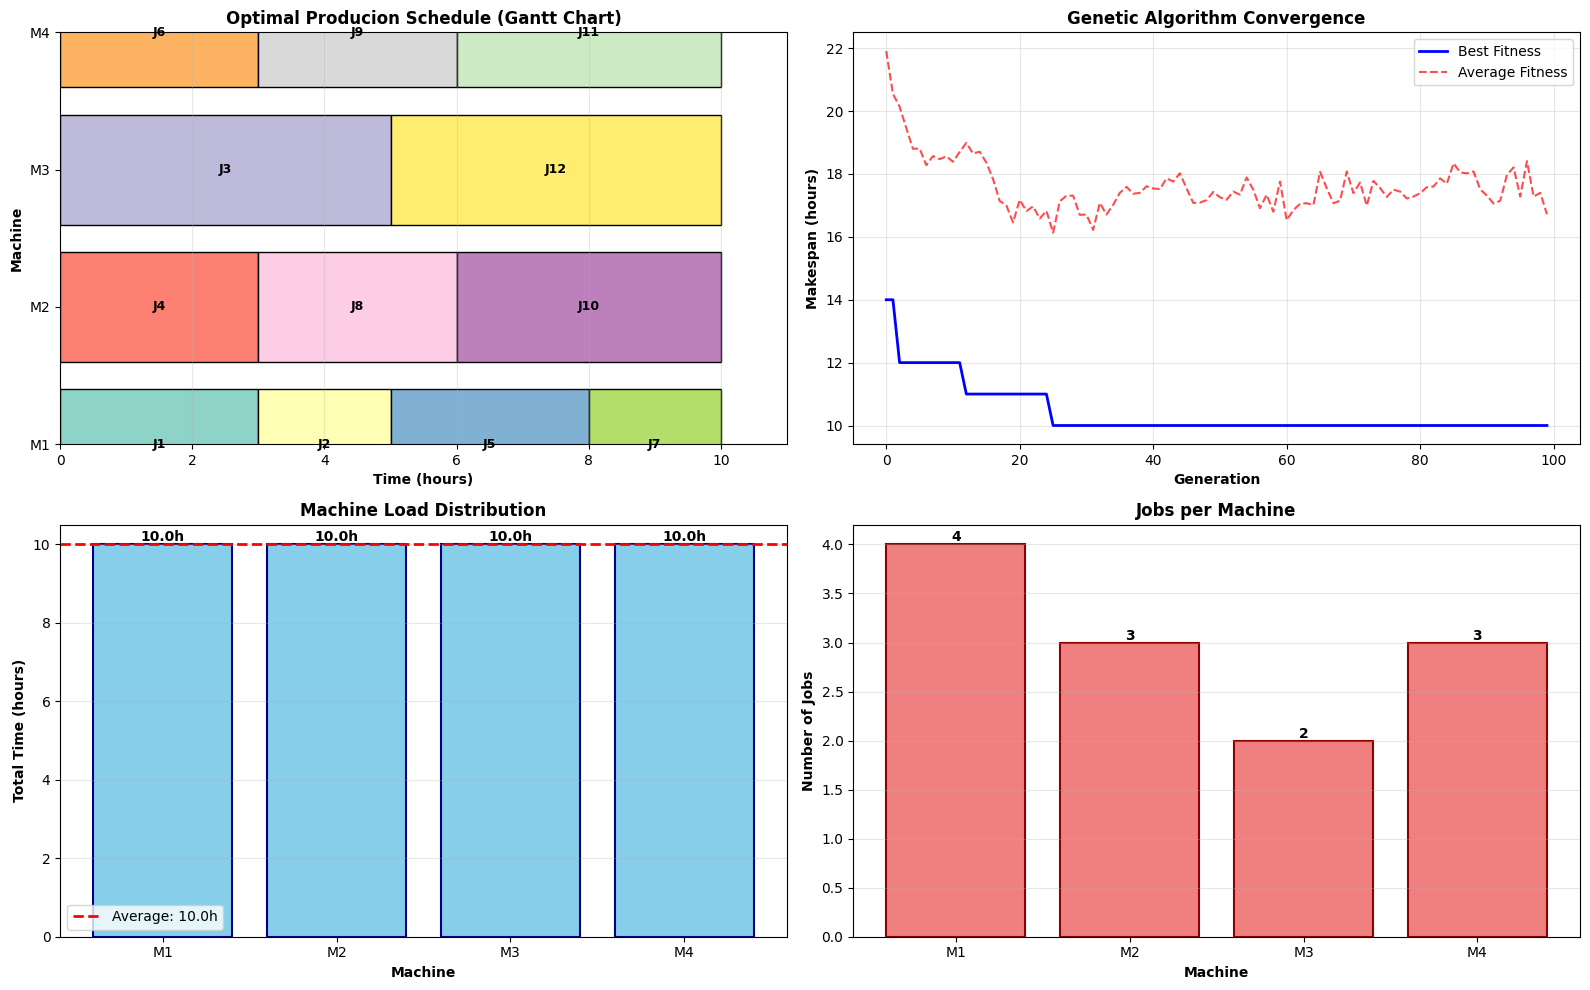

In [ ]:
def visualize_schedule(schedule: np.ndarray, processing_times: np.ndarray,
                      best_history: List[float], avg_history: List[float]):
    """
    Visualize the production schedule and optimization progress.
    """
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

    ax1.set_title('Optimal Producion Schedule (Gantt Chart)', fontsize = 12, fontweight = 'bold')

    colors = plt.cm.Set3(np.linspace(0, 1, NUM_JOBS))

    for machine_id in range(NUM_MACHINES):
        current_time = 0

        for job_id in range(NUM_JOBS):
            if schedule[job_id] == machine_id:

                duration = processing_times[job_id][machine_id]

                rect = patches.Rectangle((current_time, machine_id - 0.4), duration, 0.8, facecolor=colors[job_id], edgecolor='black')
                ax1.add_patch(rect)
                ax1.text(current_time + duration / 2, machine_id, job_names[job_id], ha='center', va='center', fontsize=9, fontweight='bold')

                current_time += duration


    ax1.set_yticks(range(NUM_MACHINES))
    ax1.set_yticklabels(machine_names)

    ax1.set_xlabel('Time (hours)', fontweight='bold')
    ax1.set_ylabel('Machine', fontweight='bold')

    ax1.set_xlim(0, 11)
    ax1.grid(True, axis='x', alpha=0.3)


    # Top-right: Evolution of fitness
    ax2.set_title('Genetic Algorithm Convergence', fontsize=12, fontweight='bold')
    generations = range(len(best_history))
    ax2.plot(generations, best_history, 'b-', linewidth=2, label='Best Fitness')
    ax2.plot(generations, avg_history, 'r--', linewidth=1.5, label='Average Fitness', alpha=0.7)
    ax2.set_xlabel('Generation', fontweight='bold')
    ax2.set_ylabel('Makespan (hours)', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Bottom-left: Machine load distribution
    ax3.set_title('Machine Load Distribution', fontsize=12, fontweight='bold')
    machine_loads = np.zeros(NUM_MACHINES)
    for job_id, machine_id in enumerate(schedule):
        machine_loads[machine_id] += processing_times[job_id][machine_id]
    
    bars = ax3.bar(machine_names, machine_loads, color='skyblue', edgecolor='navy', linewidth=1.5)
    ax3.axhline(y=machine_loads.mean(), color='r', linestyle='--', 
                linewidth=2, label=f'Average: {machine_loads.mean():.1f}h')
    ax3.set_ylabel('Total Time (hours)', fontweight='bold')
    ax3.set_xlabel('Machine', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar, load in zip(bars, machine_loads):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{load:.1f}h', ha='center', va='bottom', fontweight='bold')
    
    # Bottom-right: Job distribution per machine
    ax4.set_title('Jobs per Machine', fontsize=12, fontweight='bold')
    jobs_per_machine = np.bincount(schedule, minlength=NUM_MACHINES)
    bars = ax4.bar(machine_names, jobs_per_machine, color='lightcoral', 
                   edgecolor='darkred', linewidth=1.5)
    ax4.set_ylabel('Number of Jobs', fontweight='bold')
    ax4.set_xlabel('Machine', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar, count in zip(bars, jobs_per_machine):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


# Create visualization
visualize_schedule(best_schedule, processing_times, best_history, avg_history)

In [ ]:
ax1.set_title('Optimal Producion Schedule (Gantt Chart)', fontsize = 12, fontweight = 'bold')

    colors = plt.cm.Set3(np.linspace(0, 1, NUM_JOBS))
    

    for machine_id in range (NUM_MACHINES):
        current_time = 0

        for job_id in range (NUM_JOBS):

            if schedule[job_id] == machine_id:

                duration = processing_times[job_id][machine_id]

                rect = patches.Rectangle((current_time, machine_id - 0.4), duration, 0.8)
                ax1.add_patch(rect)
               # ax1.text(current_time + duration/2, machine_id, job_names[job_id])
                current_time += duration

    ax1.set_yticks(range(NUM_MACHINES))
    ax1.set_yticklabels(machine_names)

    ax1.set_xlabel('Time (hours)', fontweight='bold')
    ax1.set_ylabel('Machine', fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    